# Introduction

Since Jan. 1, 2015, [The Washington Post](https://www.washingtonpost.com/) has been compiling a database of every fatal shooting in the US by a police officer in the line of duty. 

<center><img src=https://i.imgur.com/sX3K62b.png></center>

While there are many challenges regarding data collection and reporting, The Washington Post has been tracking more than a dozen details about each killing. This includes the race, age and gender of the deceased, whether the person was armed, and whether the victim was experiencing a mental-health crisis. The Washington Post has gathered this supplemental information from law enforcement websites, local new reports, social media, and by monitoring independent databases such as "Killed by police" and "Fatal Encounters". The Post has also conducted additional reporting in many cases.

There are 4 additional datasets: US census data on poverty rate, high school graduation rate, median household income, and racial demographics. [Source of census data](https://factfinder.census.gov/faces/nav/jsf/pages/community_facts.xhtml).

### Upgrade Plotly

Run the cell below if you are working with Google Colab

In [ ]:
%pip install --upgrade plotly

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.2/15.2 MB 25.9 MB/s eta 0:00:00
  Attempting uninstall: plotly
    Found existing installation: plotly 5.5.0
    Uninstalling plotly-5.5.0:
      Successfully uninstalled plotly-5.5.0


## Import Statements

In [3]:
import numpy as np
import pandas as pd
import plotly.express as px
import matplotlib.pyplot as plt
import seaborn as sns

# This might be helpful:
from collections import Counter

## Notebook Presentation

In [4]:
pd.options.display.float_format = '{:,.2f}'.format

## Load the Data

In [6]:
df_hh_income = pd.read_csv('Median_Household_Income_2015.csv', encoding="windows-1252")
df_pct_poverty = pd.read_csv('Pct_People_Below_Poverty_Level.csv', encoding="windows-1252")
df_pct_completed_hs = pd.read_csv('Pct_Over_25_Completed_High_School.csv', encoding="windows-1252")
df_share_race_city = pd.read_csv('Share_of_Race_By_City.csv', encoding="windows-1252")
df_fatalities = pd.read_csv('Deaths_by_Police_US.csv', encoding="windows-1252")

# Preliminary Data Exploration

* What is the shape of the DataFrames? 
* How many rows and columns do they have?
* What are the column names?
* Are there any NaN values or duplicates?

In [ ]:
print(df_hh_income.shape)
print("________________")
print(df_hh_income.columns)
print("________________")
print(df_hh_income[df_hh_income.duplicated()==True])
print("_______________")
print(df_hh_income.isna().sum())

(29322, 3)
________________
Index(['Geographic Area', 'City', 'Median Income'], dtype='object')
________________
Empty DataFrame
Columns: [Geographic Area, City, Median Income]
Index: []
_______________
Geographic Area     0
City                0
Median Income      51
dtype: int64


In [ ]:
print(df_pct_poverty.shape)
print("________________")
print(df_pct_poverty.columns)
print("________________")
print(df_pct_poverty[df_pct_poverty.duplicated()==True])
print("_______________")
print(df_pct_poverty.isna().sum())

(29329, 3)
________________
Index(['Geographic Area', 'City', 'poverty_rate'], dtype='object')
________________
Empty DataFrame
Columns: [Geographic Area, City, poverty_rate]
Index: []
_______________
Geographic Area    0
City               0
poverty_rate       0
dtype: int64


In [ ]:
print(df_pct_completed_hs.shape)
print("________________")
print(df_pct_completed_hs.columns)
print("________________")
print(df_pct_completed_hs[df_pct_completed_hs.duplicated()==True])
print("_______________")
print(df_pct_completed_hs.isna().sum())

(29329, 3)
________________
Index(['Geographic Area', 'City', 'percent_completed_hs'], dtype='object')
________________
Empty DataFrame
Columns: [Geographic Area, City, percent_completed_hs]
Index: []
_______________
Geographic Area         0
City                    0
percent_completed_hs    0
dtype: int64


In [ ]:
print(df_share_race_city.shape)
print("________________")
print(df_share_race_city.columns)
print("________________")
print(df_share_race_city[df_share_race_city.duplicated()==True])
print("_______________")
print(df_share_race_city.isna().sum())

(29268, 7)
________________
Index(['Geographic area', 'City', 'share_white', 'share_black',
       'share_native_american', 'share_asian', 'share_hispanic'],
      dtype='object')
________________
Empty DataFrame
Columns: [Geographic area, City, share_white, share_black, share_native_american, share_asian, share_hispanic]
Index: []
_______________
Geographic area          0
City                     0
share_white              0
share_black              0
share_native_american    0
share_asian              0
share_hispanic           0
dtype: int64


In [ ]:
print(df_fatalities.shape)
print("________________")
print(df_fatalities.columns)
print("________________")
print(df_fatalities[df_fatalities.duplicated()==True])
print("_______________")
print(df_fatalities.isna().sum())

(2535, 14)
________________
Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')
________________
Empty DataFrame
Columns: [id, name, date, manner_of_death, armed, age, gender, race, city, state, signs_of_mental_illness, threat_level, flee, body_camera]
Index: []
_______________
id                           0
name                         0
date                         0
manner_of_death              0
armed                        9
age                         77
gender                       0
race                       195
city                         0
state                        0
signs_of_mental_illness      0
threat_level                 0
flee                        65
body_camera                  0
dtype: int64


In [ ]:
df_fatalities

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2530,2822,Rodney E. Jacobs,28/07/17,shot,gun,31.00,M,NaN,Kansas City,MO,False,attack,Not fleeing,False
2531,2813,TK TK,28/07/17,shot,vehicle,NaN,M,NaN,Albuquerque,NM,False,attack,Car,False
2532,2818,Dennis W. Robinson,29/07/17,shot,gun,48.00,M,NaN,Melba,ID,False,attack,Car,False
2533,2817,Isaiah Tucker,31/07/17,shot,vehicle,28.00,M,B,Oshkosh,WI,False,attack,Car,True


## Data Cleaning - Check for Missing Values and Duplicates

Consider how to deal with the NaN values. Perhaps substituting 0 is appropriate. 

In [ ]:
df_hh_income["Median Income"] = df_hh_income["Median Income"].fillna(0)

In [ ]:
df_fatalities["age"] = df_fatalities["age"].fillna(0)

# Chart the Poverty Rate in each US State

Create a bar chart that ranks the poverty rate from highest to lowest by US state. Which state has the highest poverty rate? Which state has the lowest poverty rate?  Bar Plot

In [ ]:
state_poverty = df_pct_poverty.loc[df_pct_poverty["poverty_rate"] != "-"]
state_poverty["poverty_rate"] = state_poverty["poverty_rate"].astype("float")

<ipython-input-13-99d5505deac5>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_poverty["poverty_rate"] = state_poverty["poverty_rate"].astype("float")


In [ ]:
state_poverty = state_poverty.groupby("Geographic Area", as_index=False)

In [ ]:
state_poverty = state_poverty["poverty_rate"].mean().sort_values(by="poverty_rate", ascending=False)

In [ ]:
state_poverty

,Geographic Area,poverty_rate
25,MS,26.88
3,AZ,25.67
10,GA,23.78
32,NM,23.08
2,AR,22.96
18,LA,22.34
40,SC,22.16
49,WV,21.13
36,OK,20.66
1,AL,20.65


<BarContainer object of 51 artists>

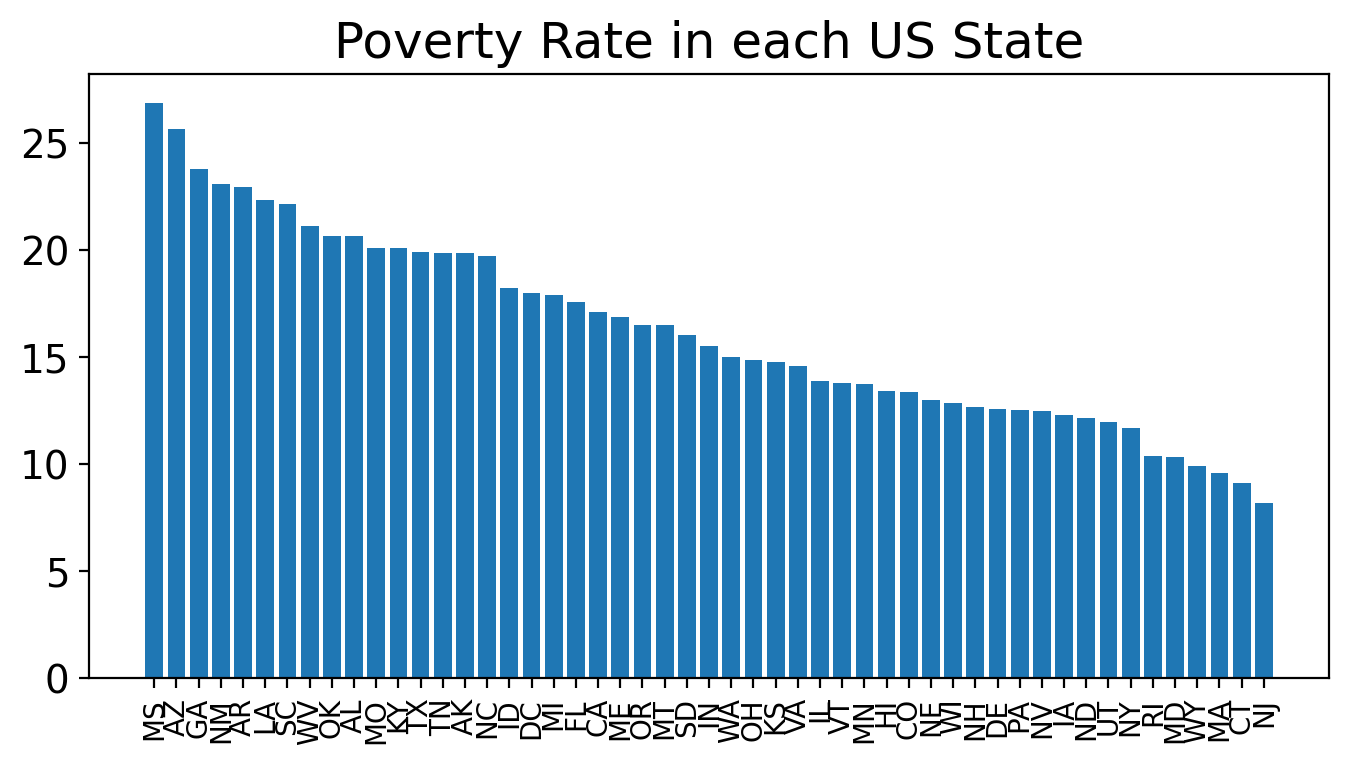

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=200)
plt.title("Poverty Rate in each US State", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=10, rotation=90)

ax = plt.gca()

ax.bar(state_poverty["Geographic Area"], state_poverty["poverty_rate"])

# Chart the High School Graduation Rate by US State

Show the High School Graduation Rate in ascending order of US States. Which state has the lowest high school graduation rate? Which state has the highest?

In [ ]:
state_graduations = df_pct_completed_hs.loc[df_pct_completed_hs["percent_completed_hs"] != "-"]
state_graduations["percent_completed_hs"] = state_graduations["percent_completed_hs"].astype(float)

<ipython-input-18-f6e6e7268734>:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  state_graduations["percent_completed_hs"] = state_graduations["percent_completed_hs"].astype(float)


In [ ]:
state_graduations = state_graduations.groupby("Geographic Area", as_index=False)

In [ ]:
state_graduations = state_graduations["percent_completed_hs"].mean().sort_values("percent_completed_hs", ascending=False)

<BarContainer object of 51 artists>

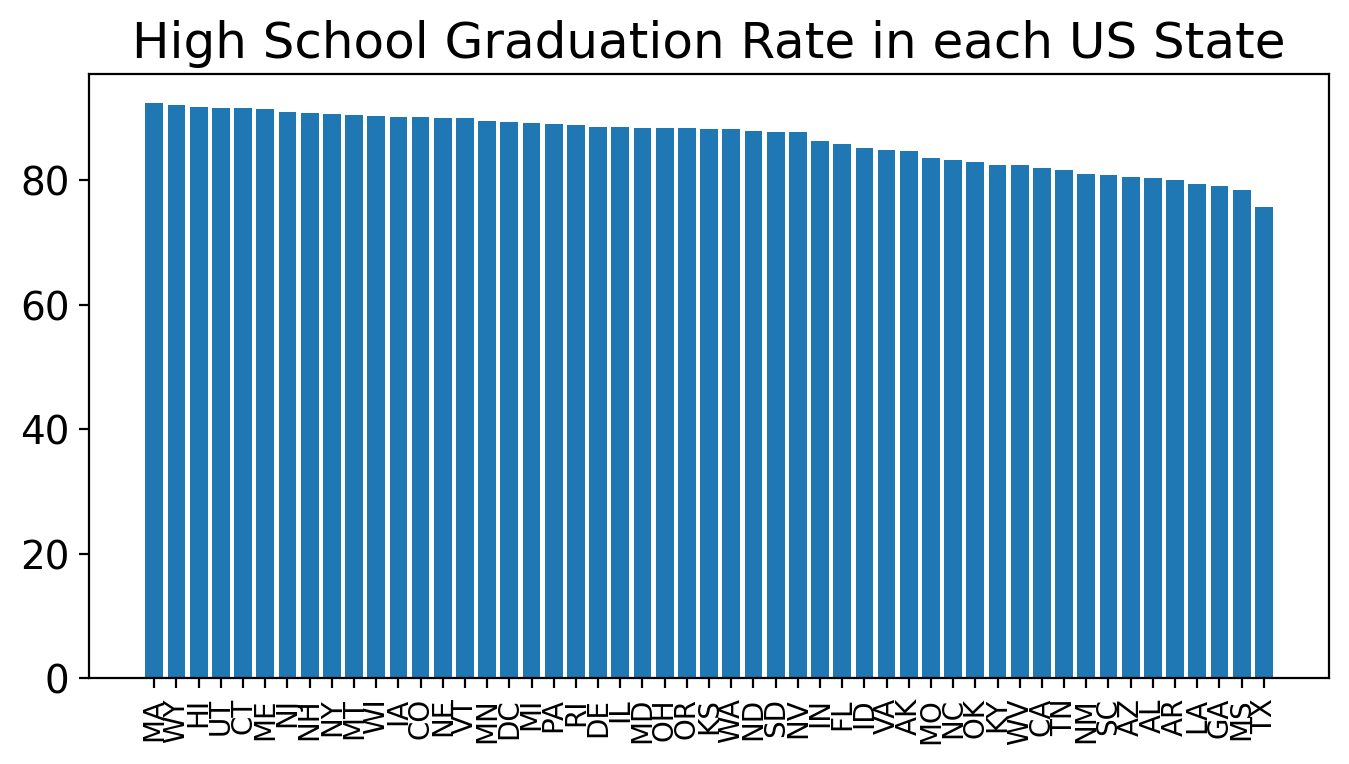

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(8,4), dpi=200)
plt.title("High School Graduation Rate in each US State", fontsize=18)
plt.yticks(fontsize=14)
plt.xticks(fontsize=10, rotation=90)

ax = plt.gca()

ax.bar(state_graduations["Geographic Area"], state_graduations["percent_completed_hs"])

# Visualise the Relationship between Poverty Rates and High School Graduation Rates

#### Create a line chart with two y-axes to show if the rations of poverty and high school graduation move together.  

In [ ]:
poverty_and_graduations = pd.merge(state_graduations, state_poverty, on="Geographic Area").sort_values(by="Geographic Area")

In [ ]:
poverty_and_graduations.head()

,Geographic Area,percent_completed_hs,poverty_rate
34,AK,84.63,19.85
45,AL,80.30,20.65
46,AR,79.95,22.96
44,AZ,80.47,25.67
40,CA,81.96,17.12


Text(0, 0.5, 'Poverty Rate')

<Figure size 1008x576 with 0 Axes>

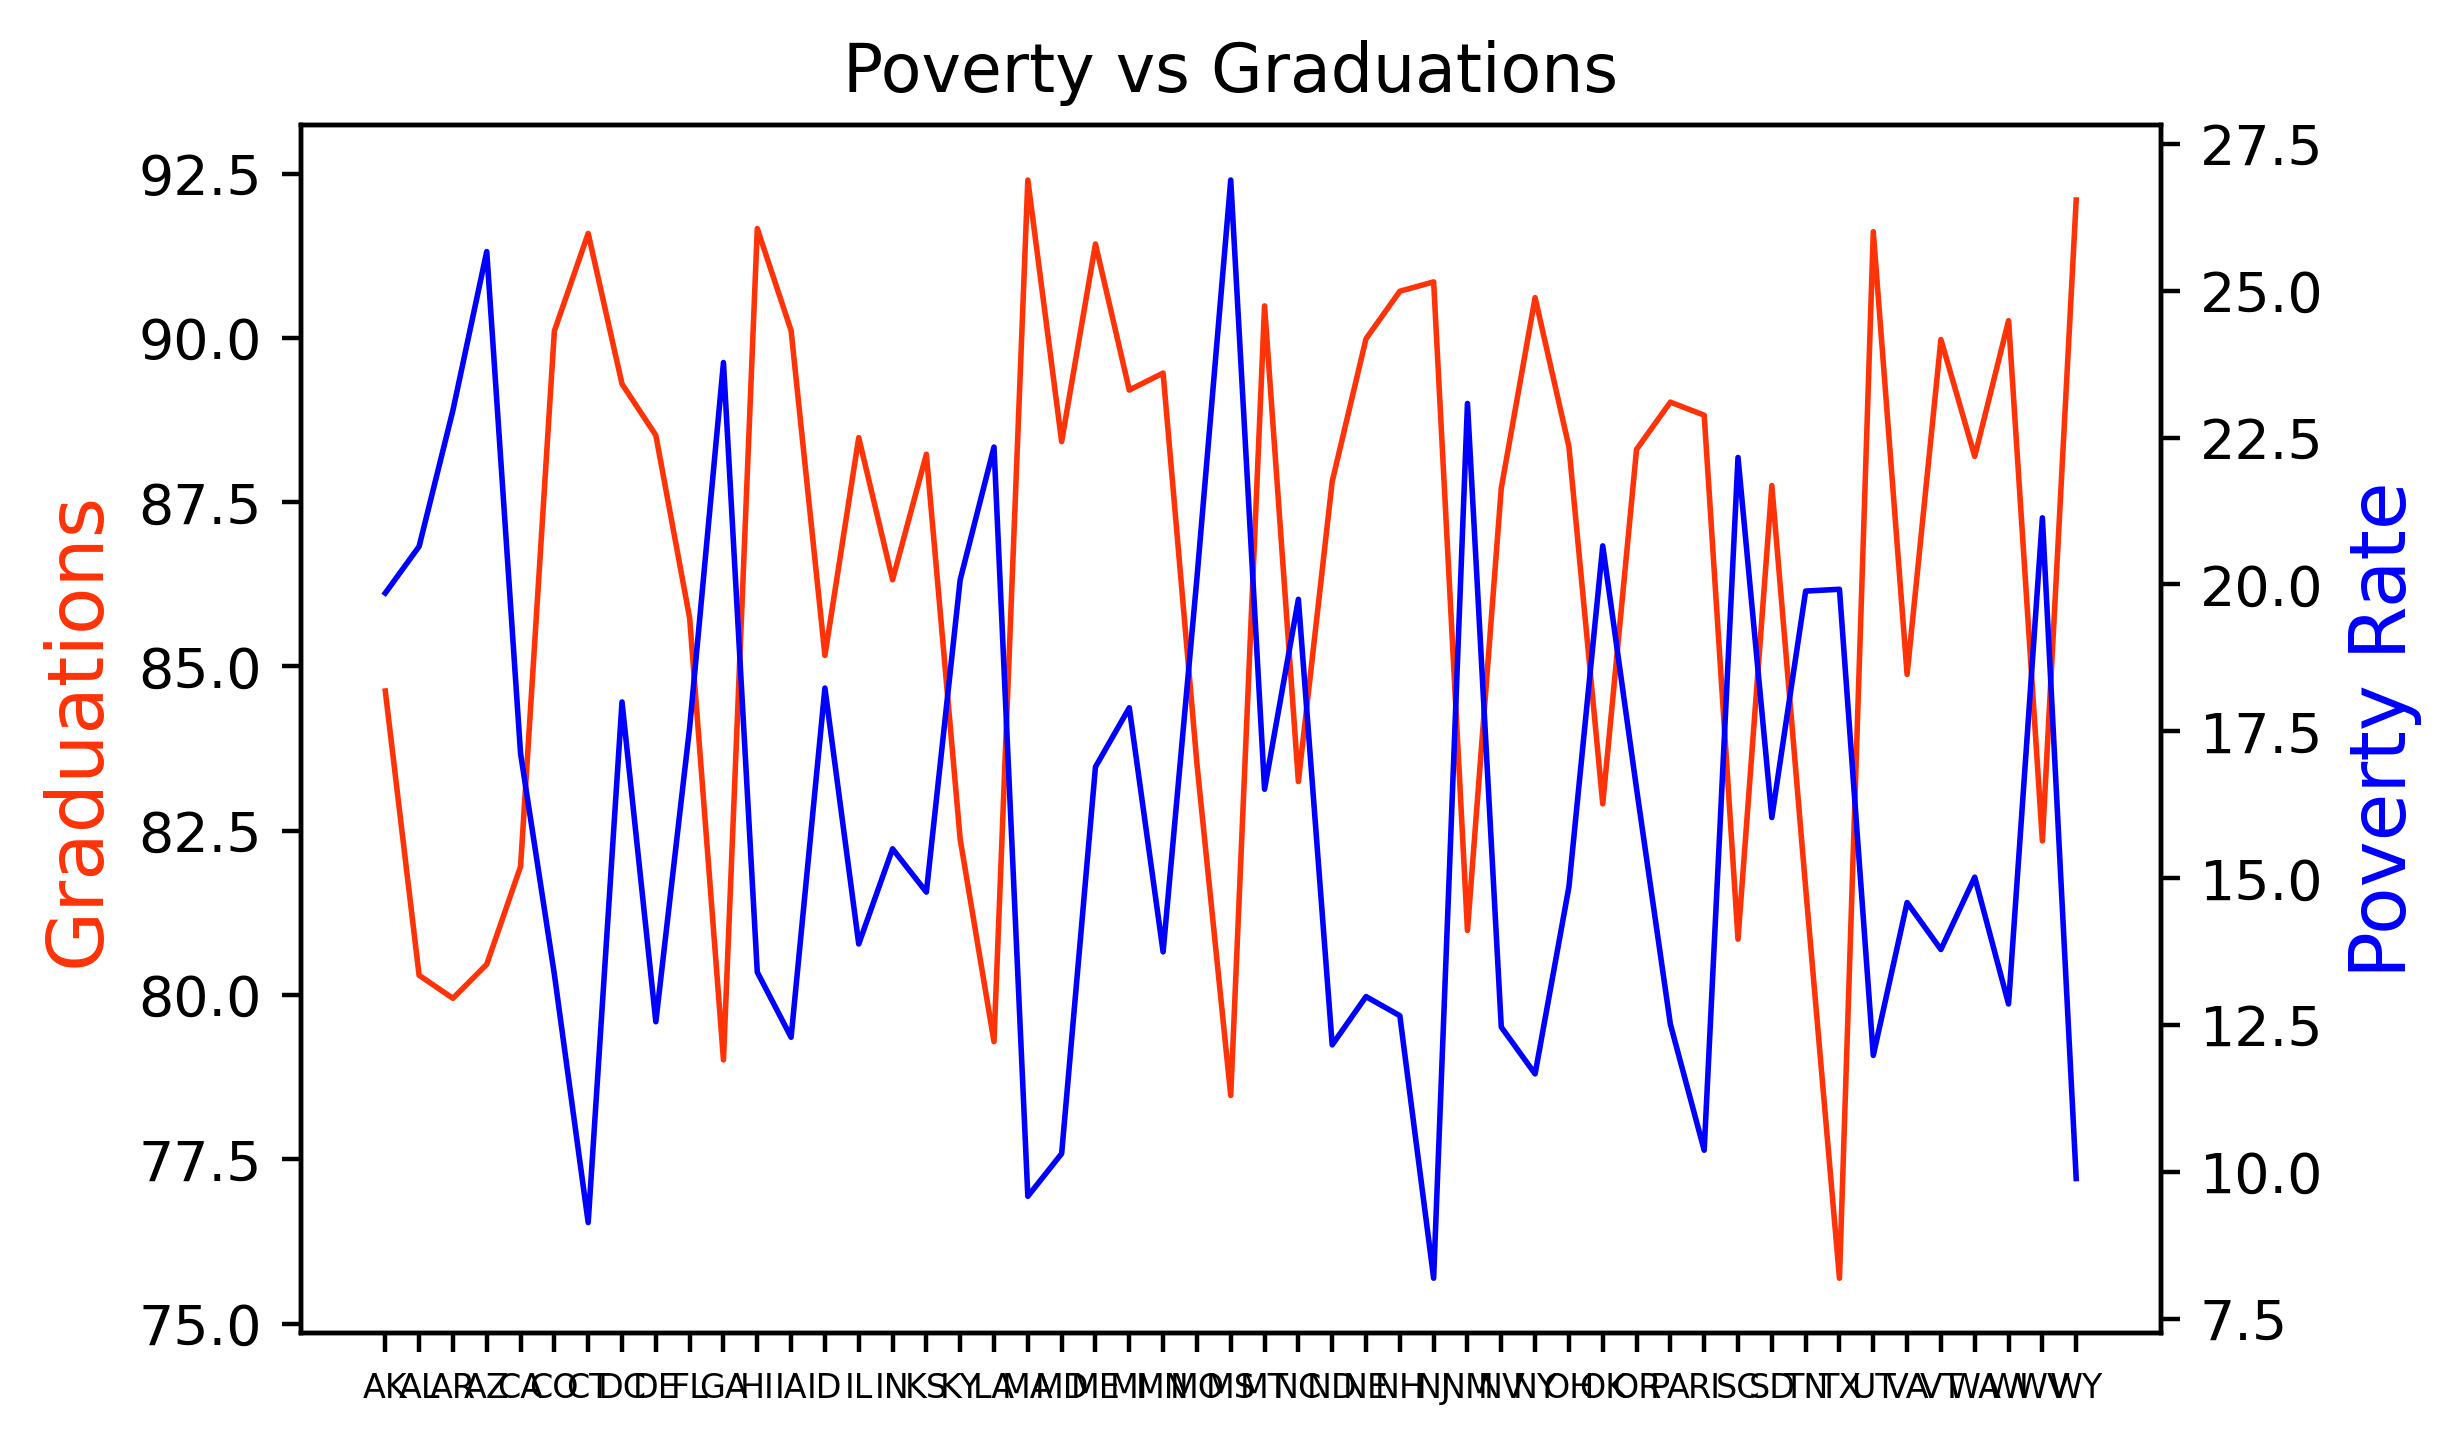

In [ ]:
plt.figure(figsize=(14,8))
plt.figure(dpi=400)
plt.title("Poverty vs Graduations", fontsize=12)
plt.xticks(fontsize=6)


ax1 = plt.gca()
ax2 = ax1.twinx()

ax1.plot(poverty_and_graduations["Geographic Area"], poverty_and_graduations["percent_completed_hs"], color="#ff3308", linewidth=1)
ax2.plot(poverty_and_graduations["Geographic Area"], poverty_and_graduations["poverty_rate"], color="blue", linewidth=1)

ax1.set_ylabel('Graduations', color='#ff3308', fontsize=14)
ax2.set_ylabel('Poverty Rate', color='blue', fontsize=14)


#### Now use a Seaborn .jointplot() with a Kernel Density Estimate (KDE) and/or scatter plot to visualise the same relationship

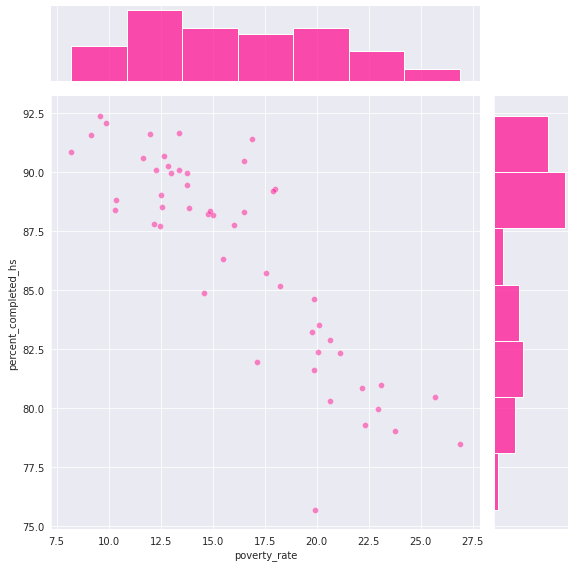

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=poverty_and_graduations['poverty_rate'], 
                y=poverty_and_graduations['percent_completed_hs'], 
                height=8, 
                kind='scatter',
                color='deeppink', 
                joint_kws={'alpha':0.5})

plt.show()

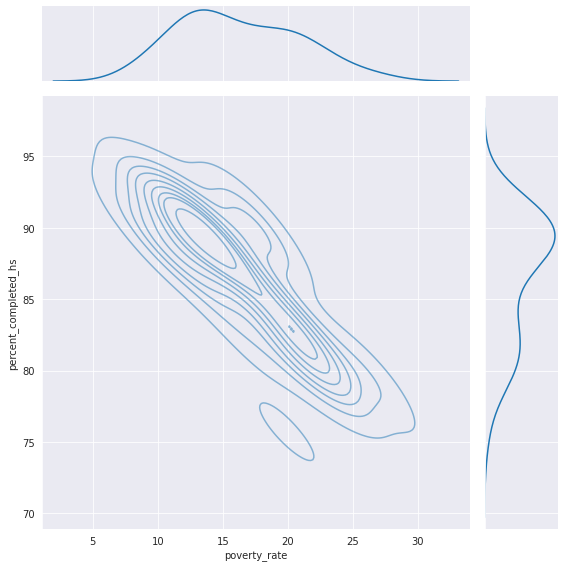

In [ ]:
with sns.axes_style('darkgrid'):
  sns.jointplot(x=poverty_and_graduations['poverty_rate'], 
                y=poverty_and_graduations['percent_completed_hs'], 
                height=8, 
                kind='kde',
                
                joint_kws={'alpha':0.5})

#### Seaborn's `.lmplot()` or `.regplot()` to show a linear regression between the poverty ratio and the high school graduation ratio. 

<AxesSubplot:xlabel='poverty_rate', ylabel='percent_completed_hs'>

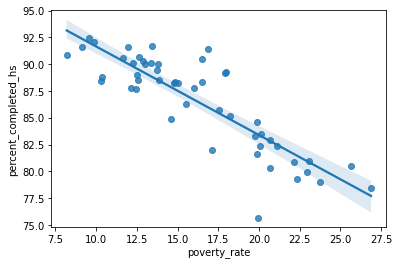

In [ ]:
sns.regplot(data=poverty_and_graduations, x="poverty_rate", y="percent_completed_hs")

# Create a Bar Chart with Subsections Showing the Racial Makeup of Each US State

Visualise the share of the white, black, hispanic, asian and native american population in each US State using a bar chart with sub sections. 

In [ ]:
df_share_race_city.describe()

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
count,29268,29268,29268,29268,29268,29268,29268
unique,51,24219,997,926,628,409,956
top,PA,Franklin city,100,0,0,0,0
freq,1764,16,1051,6587,6930,8537,2489


In [ ]:
# .ne means not equal to and .all(1) means..something but it works

state_races = df_share_race_city[df_share_race_city.ne("(X)").all(1)]


In [ ]:
state_races = state_races.astype({"share_white": "float", "share_black": "float", "share_native_american": "float", "share_asian": "float", "share_hispanic": "float"}) 

In [ ]:
state_races = state_races.groupby("Geographic area", as_index=False).mean()

In [ ]:
state_races

,Geographic area,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AK,45.65,0.57,45.86,1.39,2.15
1,AL,72.51,23.32,0.66,0.48,2.98
2,AR,78.45,16.30,0.76,0.48,4.27
3,AZ,59.93,0.95,28.59,0.73,20.14
4,CA,71.87,2.69,1.72,5.57,29.65
5,CO,87.77,0.92,1.62,1.15,17.90
6,CT,86.11,4.99,0.66,2.99,7.98
7,DC,38.50,50.70,0.30,3.50,9.10
8,DE,76.25,15.39,0.52,2.00,7.42
9,FL,78.67,13.37,0.46,1.62,16.53


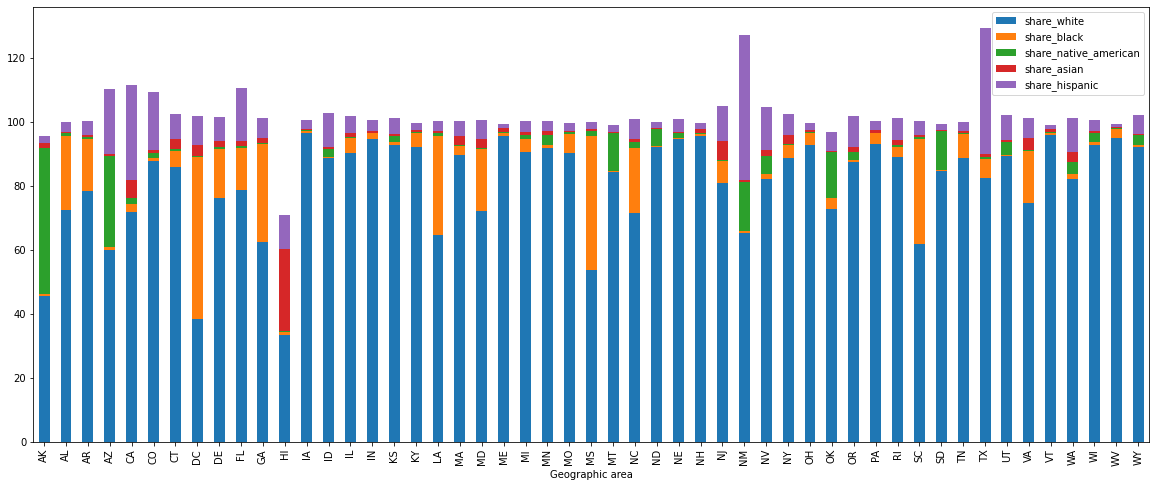

In [ ]:
fig = state_races.plot.bar(x="Geographic area", stacked=True, figsize=(20,8))


# Create Donut Chart by of People Killed by Race

Hint: Use `.value_counts()`

In [ ]:
race_fatalities = df_fatalities["race"].value_counts()

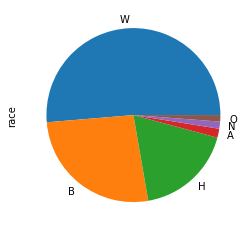

In [ ]:
fig = race_fatalities.plot.pie()

# Create a Chart Comparing the Total Number of Deaths of Men and Women

Use `df_fatalities` to illustrate how many more men are killed compared to women. 

In [ ]:
gender_fatalities = df_fatalities["gender"].value_counts()

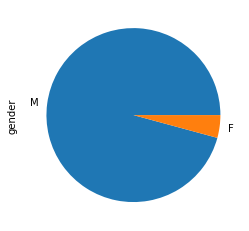

In [ ]:
fig = gender_fatalities.plot.pie()

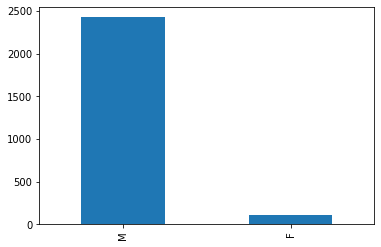

In [ ]:
fig = gender_fatalities.plot.bar()

# Create a Box Plot Showing the Age and Manner of Death

Break out the data by gender using `df_fatalities`. Is there a difference between men and women in the manner of death? 

In [ ]:
manner = df_fatalities[["manner_of_death", "gender"]].value_counts().reset_index()

In [ ]:
manner.rename(columns={0: "counts"}, inplace=True)

In [ ]:
manner.head()

,manner_of_death,gender,counts
0,shot,M,2261
1,shot and Tasered,M,167
2,shot,F,102
3,shot and Tasered,F,5


In [ ]:
box_manner = px.box(manner, x="gender", y="counts", color="manner_of_death", notched=True, boxmode="group")
box_manner.update_layout(title="Manner of death and gender")
box_manner.show()

# Were People Armed? 

In what percentage of police killings were people armed? Create chart that show what kind of weapon (if any) the deceased was carrying. How many of the people killed by police were armed with guns versus unarmed? 

In [ ]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [ ]:
armed = df_fatalities[["armed"]].value_counts()
armed

armed          
gun                1398
knife               373
vehicle             177
unarmed             171
undetermined        117
                   ... 
bayonet               1
hand torch            1
metal hand tool       1
machete and gun       1
bean-bag gun          1
Length: 68, dtype: int64

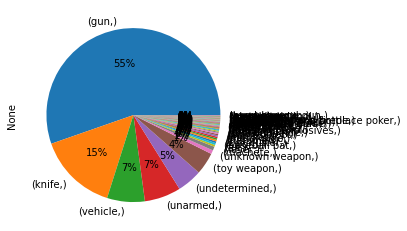

In [ ]:
armed_plot = armed.plot.pie(autopct='%1.0f%%')

# How Old Were the People Killed?

Work out what percentage of people killed were under 25 years old.  

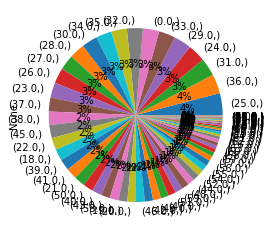

In [ ]:
ages = df_fatalities[["age"]].value_counts()
ages_plot = ages.plot.pie(autopct='%1.0f%%')

In [ ]:
df_fatalities[df_fatalities["age"] <= 25].shape

(630, 14)

In [ ]:
df_fatalities.shape

(2535, 14)

In [ ]:
630/2535*100

24.85207100591716

Create a histogram and KDE plot that shows the distribution of ages of the people killed by police. 

<AxesSubplot:>

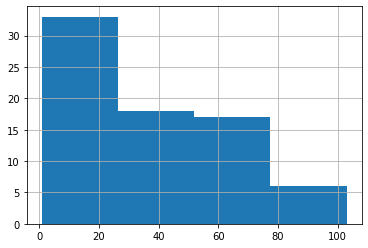

In [ ]:
ages.hist(bins=4)

In [ ]:
ages

age  
25.00    103
36.00     91
31.00     85
24.00     83
29.00     83
        ... 
79.00      1
13.00      1
6.00       1
14.00      1
91.00      1
Length: 74, dtype: int64

In [ ]:
ages.values

array([103,  91,  85,  83,  83,  78,  77,  75,  74,  74,  74,  73,  72,
        72,  71,  66,  63,  62,  57,  54,  53,  52,  52,  47,  46,  42,
        42,  41,  41,  41,  39,  38,  37,  36,  35,  35,  32,  31,  29,
        28,  28,  23,  20,  18,  16,  16,  16,  13,  11,  11,   8,   8,
         7,   7,   6,   5,   5,   5,   4,   3,   2,   2,   2,   2,   2,
         2,   2,   1,   1,   1,   1,   1,   1,   1])

In [ ]:
df_ages = ages.reset_index()
df_ages = df_ages.rename(columns={0:"count"})

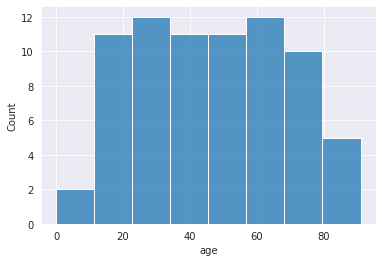

In [ ]:
with sns.axes_style('darkgrid'):
  sns.histplot(data=df_ages, 
               x="age",
               )


<AxesSubplot:xlabel='age', ylabel='Density'>

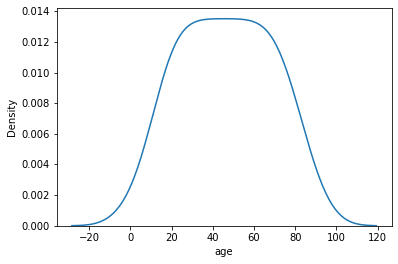

In [ ]:
  sns.kdeplot(data=df_ages, x="age")

<AxesSubplot:xlabel='age', ylabel='Count'>

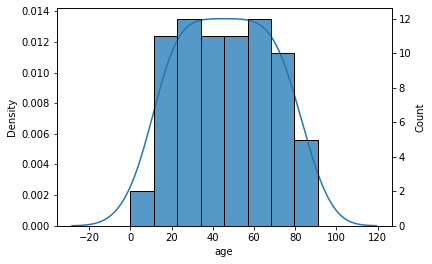

In [ ]:
fig, ax1 = plt.subplots()
sns.kdeplot(data=df_ages, x="age", ax=ax1)
ax2 = ax1.twinx()
sns.histplot(data=df_ages, x="age", ax=ax2)

Create a seperate KDE plot for each race. Is there a difference between the distributions? 

In [ ]:
df_fatalities.columns

Index(['id', 'name', 'date', 'manner_of_death', 'armed', 'age', 'gender',
       'race', 'city', 'state', 'signs_of_mental_illness', 'threat_level',
       'flee', 'body_camera'],
      dtype='object')

In [ ]:
df_w_fatalities = df_fatalities[df_fatalities["race"] == "W"]

In [ ]:
w_ages = df_w_fatalities["age"].value_counts().reset_index()
w_ages = w_ages.rename(columns={0:"count"})
w_ages

,index,age
0,36.00,52
1,45.00,39
2,26.00,38
3,25.00,37
4,30.00,37
...,...,...
64,12.00,1
65,91.00,1
66,73.00,1
67,79.00,1


<AxesSubplot:xlabel='age', ylabel='Count'>

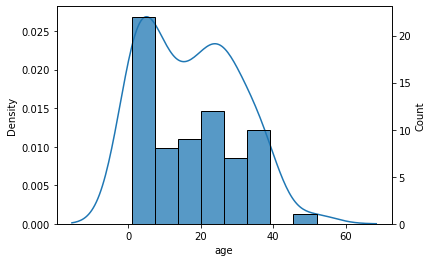

In [ ]:
fig, ax1 = plt.subplots()
sns.kdeplot(data=w_ages, x="age", ax=ax1)
ax2 = ax1.twinx()
sns.histplot(data=w_ages, x="age", ax=ax2)

<AxesSubplot:xlabel='age', ylabel='Count'>

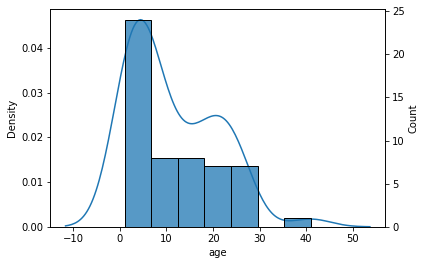

In [ ]:
df_b_fatalities = df_fatalities[df_fatalities["race"] == "B"]
b_ages = df_b_fatalities["age"].value_counts().reset_index()
b_ages = b_ages.rename(columns={0:"count"})
b_ages

fig, ax1 = plt.subplots()
sns.kdeplot(data=b_ages, x="age", ax=ax1)
ax2 = ax1.twinx()
sns.histplot(data=b_ages, x="age", ax=ax2)

<AxesSubplot:xlabel='age', ylabel='Count'>

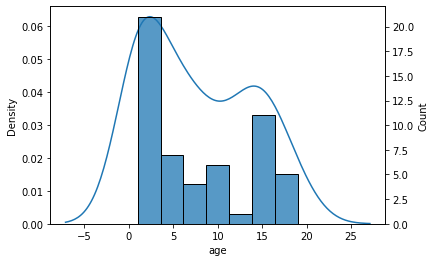

In [ ]:
df_h_fatalities = df_fatalities[df_fatalities["race"] == "H"]
h_ages = df_h_fatalities["age"].value_counts().reset_index()
h_ages = h_ages.rename(columns={0:"count"})
h_ages

fig, ax1 = plt.subplots()
sns.kdeplot(data=h_ages, x="age", ax=ax1)
ax2 = ax1.twinx()
sns.histplot(data=h_ages, x="age", ax=ax2)

# Race of People Killed

Create a chart that shows the total number of people killed by race. 

In [ ]:
race_counts = df_fatalities["race"].value_counts().reset_index()
race_counts.head()

,index,race
0,W,1201
1,B,618
2,H,423
3,A,39
4,N,31


<BarContainer object of 6 artists>

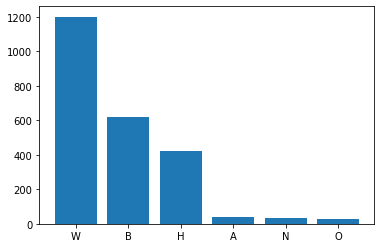

In [ ]:
plt.bar(race_counts["index"], race_counts["race"])

# Mental Illness and Police Killings

What percentage of people killed by police have been diagnosed with a mental illness?

In [ ]:
mental_illnesses = df_fatalities.signs_of_mental_illness.value_counts().reset_index()

In [ ]:
mental_illnesses = mental_illnesses.rename(columns={"signs_of_mental_illness": "count", "index": "signs_of_mental_illness"})
mental_illnesses

,signs_of_mental_illness,count
0,False,1902
1,True,633


In [ ]:
mental_illnesses_pct = mental_illnesses
mental_illnesses_pct["pct"] = mental_illnesses["count"]/mental_illnesses["count"].sum()*100
mental_illnesses_pct

,signs_of_mental_illness,count,pct
0,False,1902,75.03
1,True,633,24.97


# In Which Cities Do the Most Police Killings Take Place?

Create a chart ranking the top 10 cities with the most police killings. Which cities are the most dangerous?  

In [ ]:
top_10_cities = df_fatalities[["city", "state"]].value_counts().reset_index().rename(columns={"city": "City", "state": "Geographic area", 0: "count"})[0:10]

In [ ]:
top_10_cities

,City,Geographic area,count
0,Los Angeles,CA,39
1,Phoenix,AZ,31
2,Houston,TX,26
3,Chicago,IL,25
4,Las Vegas,NV,21
5,San Antonio,TX,20
6,Columbus,OH,17
7,Miami,FL,17
8,Austin,TX,16
9,St. Louis,MO,15


# Rate of Death by Race

Find the share of each race in the top 10 cities. Contrast this with the top 10 cities of police killings to work out the rate at which people are killed by race for each city. 

In [ ]:
df_share_race_city.City = df_share_race_city.City.astype(str)

In [ ]:
top_10_cities[["City", "Geographic area"]] = top_10_cities[["City", "Geographic area"]].astype(str)

In [ ]:
cities = df_share_race_city.copy()

In [ ]:
cities["City"] = cities["City"].str.rpartition()[0]
cities

,Geographic area,City,share_white,share_black,share_native_american,share_asian,share_hispanic
0,AL,Abanda,67.2,30.2,0,0,1.6
1,AL,Abbeville,54.4,41.4,0.1,1,3.1
2,AL,Adamsville,52.3,44.9,0.5,0.3,2.3
3,AL,Addison,99.1,0.1,0,0.1,0.4
4,AL,Akron,13.2,86.5,0,0,0.3
...,...,...,...,...,...,...,...
29263,WY,Woods Landing-Jelm,95.9,0,0,2.1,0
29264,WY,Worland,89.9,0.3,1.3,0.6,16.6
29265,WY,Wright,94.5,0.1,1.4,0.2,6.2
29266,WY,Yoder,97.4,0,0,0,4


In [ ]:
cities.City.value_counts()

Franklin                28
Clinton                 27
Fairview                26
Marion                  23
Madison                 23
                        ..
Norbourne Estates        1
North Corbin             1
Oakbrook                 1
Old Brownsboro Place     1
Y-O Ranch                1
Name: City, Length: 19443, dtype: int64

In [ ]:
top_cities = pd.merge(top_10_cities, cities, how="left", on=["City", "Geographic area"])
top_cities

,City,Geographic area,count,share_white,share_black,share_native_american,share_asian,share_hispanic
0,Los Angeles,CA,39,49.8,9.6,0.7,11.3,48.5
1,Phoenix,AZ,31,65.9,6.5,2.2,3.2,40.8
2,Houston,TX,26,50.5,23.7,0.7,6,43.8
3,Chicago,IL,25,45,32.9,0.5,5.5,28.9
4,Las Vegas,NV,21,62.1,11.1,0.7,6.1,31.5
5,San Antonio,TX,20,72.6,6.9,0.9,2.4,63.2
6,Columbus,OH,17,61.5,28,0.3,4.1,5.6
7,Miami,FL,17,72.6,19.2,0.3,1,70
8,Austin,TX,16,68.3,8.1,0.9,6.3,35.1
9,St. Louis,MO,15,43.9,49.2,0.3,2.9,3.5


In [2]:
df_kills = df_fatalities.copy()
df_kills = df_kills.rename(columns={"city": "City", "state": "Geographic area"})


NameError: ignored

In [ ]:
kills_race = pd.merge(df_kills, top_cities, on=["City", "Geographic area"], how="inner")
kills_race[kills_race["City"] == "Houston"]["race"].value_counts()

B    15
H     6
W     3
A     1
Name: race, dtype: int64

# Create a Choropleth Map of Police Killings by US State

Which states are the most dangerous? Compare your map with your previous chart. Are these the same states with high degrees of poverty? 

In [10]:
state_kills = df_fatalities.copy()["state"].value_counts().reset_index().rename(columns={"state": "count", "index":"state"})
state_kills

,state,count
0,CA,424
1,TX,225
2,FL,154
3,AZ,118
4,OH,79
5,OK,78
6,CO,74
7,GA,70
8,NC,69
9,MO,64


In [11]:
import plotly.express as px

fig = px.choropleth(locations=state_kills["state"], locationmode="USA-states", color=state_kills["count"], scope="usa")
fig.show()

# Number of Police Killings Over Time

Analyse the Number of Police Killings over Time. Is there a trend in the data? 

In [12]:
df_fatalities.head()

,id,name,date,manner_of_death,armed,age,gender,race,city,state,signs_of_mental_illness,threat_level,flee,body_camera
0,3,Tim Elliot,02/01/15,shot,gun,53.00,M,A,Shelton,WA,True,attack,Not fleeing,False
1,4,Lewis Lee Lembke,02/01/15,shot,gun,47.00,M,W,Aloha,OR,False,attack,Not fleeing,False
2,5,John Paul Quintero,03/01/15,shot and Tasered,unarmed,23.00,M,H,Wichita,KS,False,other,Not fleeing,False
3,8,Matthew Hoffman,04/01/15,shot,toy weapon,32.00,M,W,San Francisco,CA,True,attack,Not fleeing,False
4,9,Michael Rodriguez,04/01/15,shot,nail gun,39.00,M,H,Evans,CO,False,attack,Not fleeing,False


In [36]:
kill_dates = df_fatalities.copy()

In [37]:
kill_dates["date"] = pd.to_datetime(kill_dates["date"])

In [38]:
kill_dates["date"] = kill_dates["date"].dt.strftime('%Y-%m')

In [42]:
kill_dates_counts = kill_dates["date"].value_counts().sort_index().reset_index().rename(columns={"date": "count", "index": "date"})
kill_dates_counts.head()

,date,count
0,2015-01,70
1,2015-02,78
2,2015-03,87
3,2015-04,88
4,2015-05,85


<Figure size 1008x576 with 0 Axes>

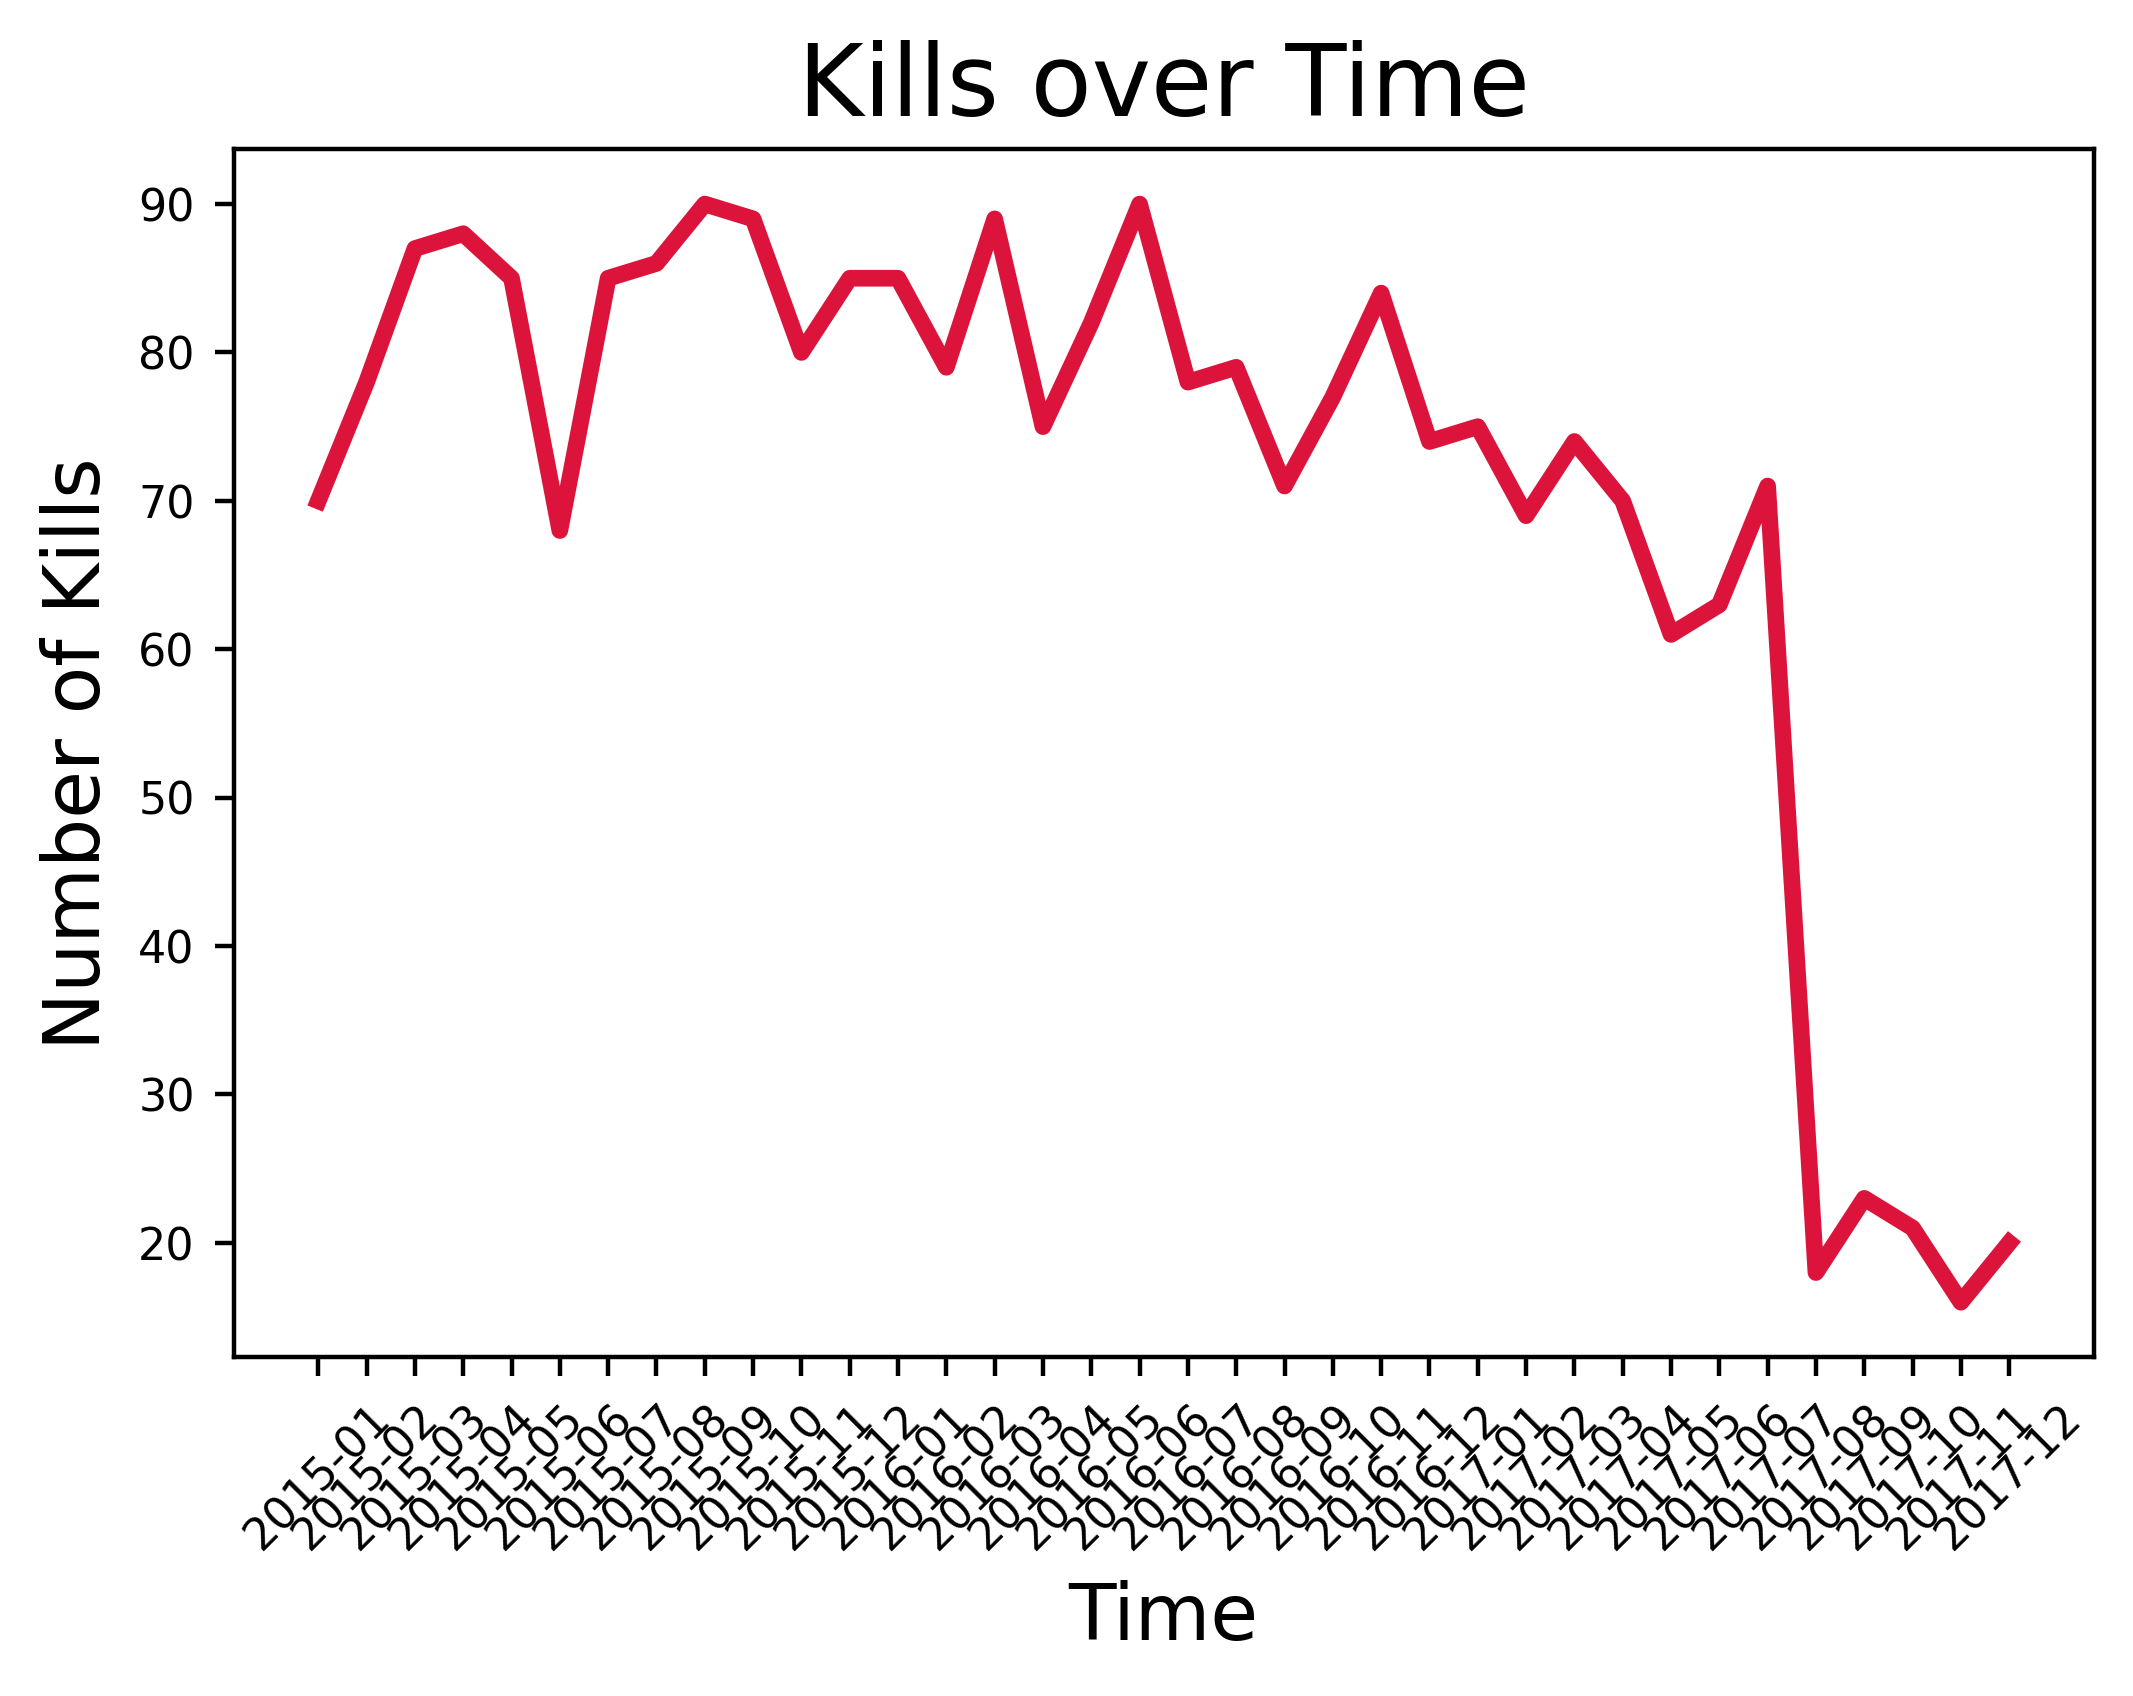

In [46]:
plt.figure(figsize=(14,8))
plt.figure(dpi=400)
plt.title("Kills over Time", fontsize=18)
plt.xticks(fontsize=8, rotation=45)
plt.yticks(fontsize=8)
plt.ylabel('Number of Kills', fontsize=14)
plt.xlabel('Time', fontsize=14)


date_plot = plt.plot(kill_dates_counts["date"], kill_dates_counts["count"], 
                       color="crimson",
                       linewidth=3)
plt.show()

# Epilogue

Now that you have analysed the data yourself, read [The Washington Post's analysis here](https://www.washingtonpost.com/graphics/investigations/police-shootings-database/).